In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords


In [279]:
df = pd.read_csv('./IMDB_Dataset.csv')
print(df.shape)

(50000, 2)


In [280]:
df=df.head(25000)
df.shape

(25000, 2)

In [281]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Quick EDA

In [282]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
24995    This movie was a real torture fest to sit thro...
24996    John Wayne & Albert Dekker compete for oil rig...
24997    Tarantino once remarked on a melodrama from th...
24998    Aah yes the workout show was a great. Not only...
24999    This film should have never been made. Honestl...
Name: review, Length: 25000, dtype: object

In [283]:
df['sentiment'].value_counts()

negative    12526
positive    12474
Name: sentiment, dtype: int64

In [284]:
df.dropna(inplace=True) 
# handling missing value

In [285]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
24995,This movie was a real torture fest to sit thro...,negative
24996,John Wayne & Albert Dekker compete for oil rig...,negative
24997,Tarantino once remarked on a melodrama from th...,positive
24998,Aah yes the workout show was a great. Not only...,positive


In [286]:
# removing stopwords

In [287]:
def clean_rev(review):
    # Get the list of stopwords
    stop_words = stopwords.words('english')
    
    # Split the review into words
    words = review.split()
    
    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the remaining words back into a single string
    cleaned_review = ' '.join(filtered_words)
    
    return cleaned_review

In [288]:
df['review'] = df['review'].apply(clean_rev)

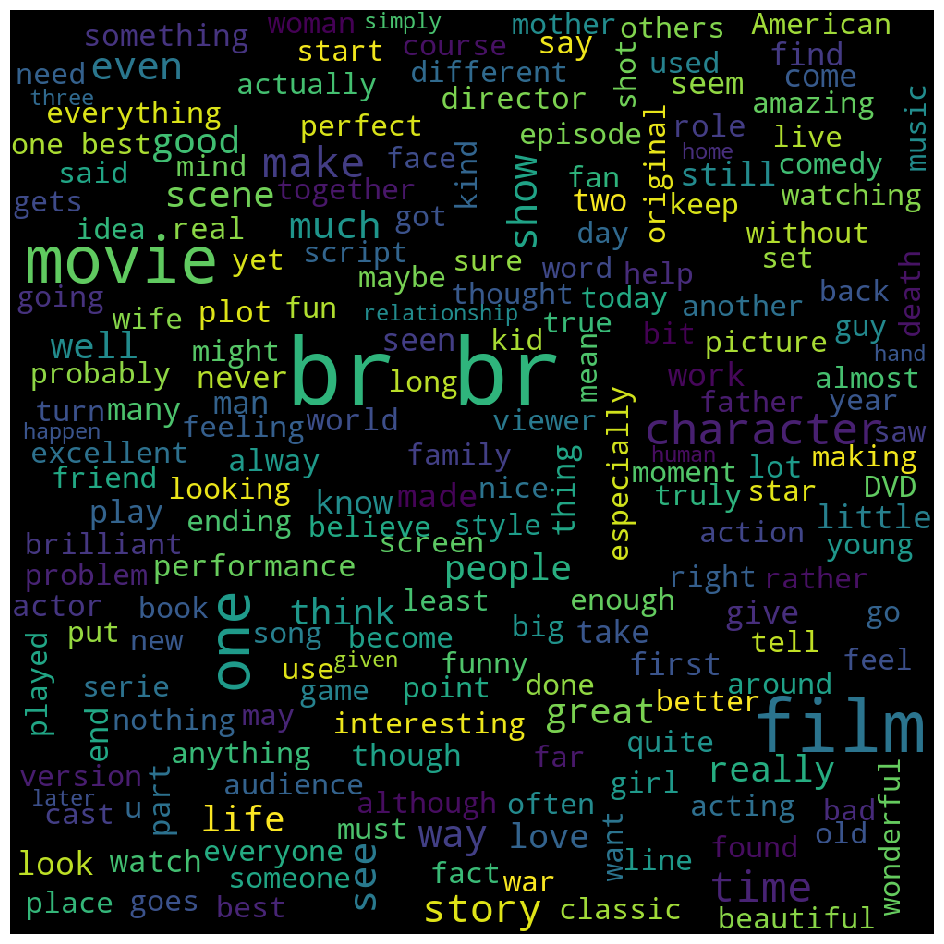

In [289]:
# draw wordcloud 
# 
reviews = ' '.join(word for word in df['review'][df['sentiment']=='positive'].astype(str))
wordcloud = WordCloud(height=1000, width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='nearest')
plt.axis('off')
plt.show()

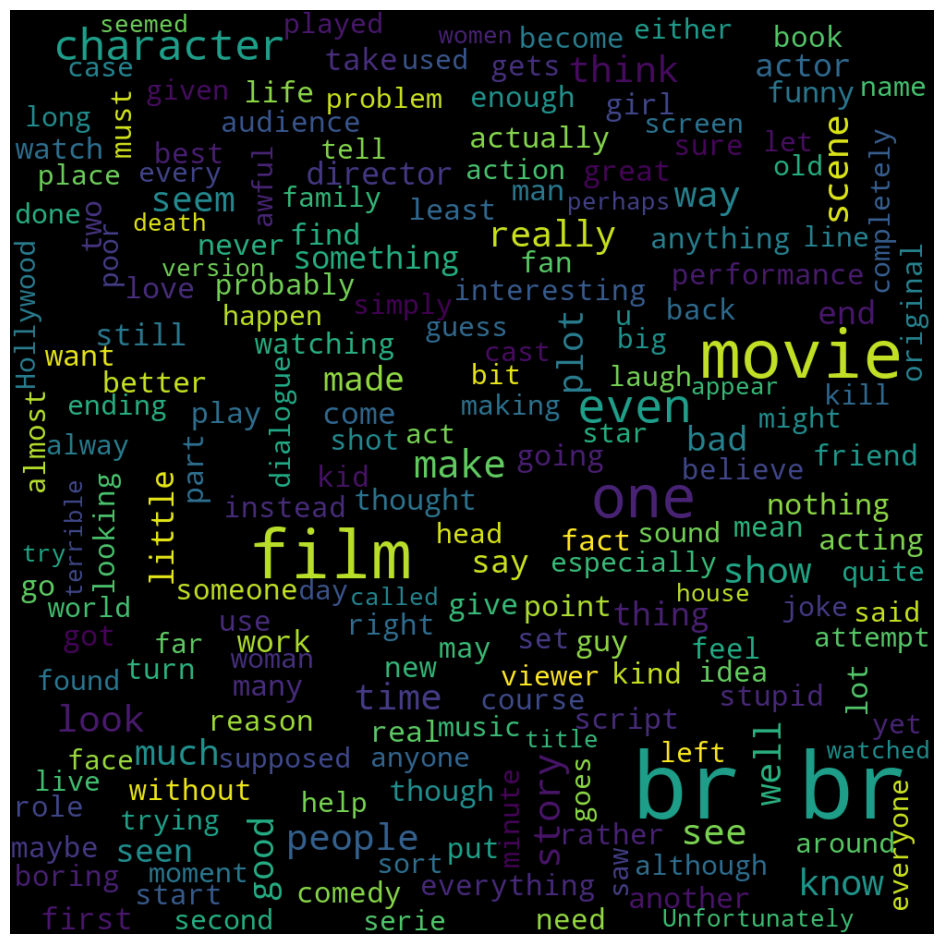

In [290]:
# negative wordcloud
reviews = ' '.join(word for word in df['review'][df['sentiment']=='negative'].astype(str))
wordcloud = WordCloud(height=1000, width=1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [291]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=22500)

In [292]:
reviews = cv.fit_transform(df['review']).toarray()

In [293]:
df['sentiment']= df['sentiment'].replace(['positive','negative'],[1,0])

In [294]:
df['sentiment'].value_counts()

0    12526
1    12474
Name: sentiment, dtype: int64

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
model = LogisticRegression()

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reviews_train, reviews_test, senti_train, senti_test = train_test_split(reviews, df['sentiment'], test_size=0.2, random_state=42)


In [299]:
model.fit(reviews_train, senti_train)

LogisticRegression()

In [300]:
predict = model.predict(reviews_test)

<function matplotlib.pyplot.show(close=None, block=None)>

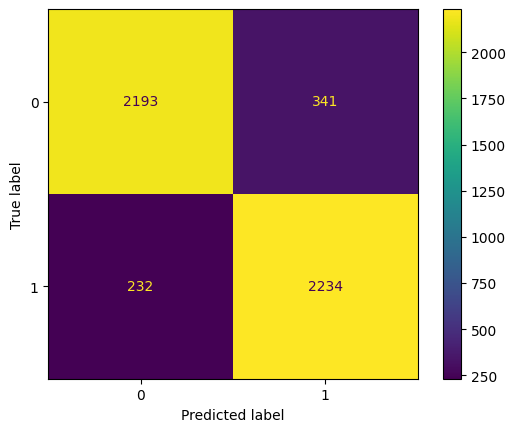

In [301]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
Cm = confusion_matrix(senti_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=Cm, display_labels=model.classes_)
display.plot()
plt.show

In [303]:
from sklearn.metrics import accuracy_score
predict = model.predict(reviews_test)

# Calculate accuracy
# i calculated accuracy here because it has balanced dataset..
accuracy = accuracy_score(senti_test, predict)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8854


In [306]:
import pickle as pk

In [307]:
pk.dump(model,open('model.pkl','wb'))

In [309]:
pk.dump(cv, open('scaler.pkl','wb'))